# Load and Visualize Time Series Data Set

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Use working Apple stock dataset from Yahoo via GitHub
url = 'https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv'
df = pd.read_csv(url)

In [16]:
#Check the columns
df.columns

Index(['Date', 'AAPL.Open', 'AAPL.High', 'AAPL.Low', 'AAPL.Close',
       'AAPL.Volume', 'AAPL.Adjusted', 'dn', 'mavg', 'up', 'direction'],
      dtype='object')

| Column              | Description                                            | Why It's Useful                                                       |
| ------------------- | ------------------------------------------------------ | --------------------------------------------------------------------- |
| **`AAPL.Open`**     | Opening price of AAPL stock on that day                | Useful to compare with closing price for intraday trends              |
| **`AAPL.High`**     | Highest price AAPL traded at during the day            | Shows volatility; used in candlestick patterns                        |
| **`AAPL.Low`**      | Lowest price AAPL traded at during the day             | Paired with high/close to assess range                                |
| **`Close`**         | Closing price of AAPL stock                            | Most commonly used for forecasting & trend analysis                   |
| **`AAPL.Volume`**   | Number of shares traded that day                       | Indicates market interest and momentum                                |
| **`AAPL.Adjusted`** | Adjusted closing price accounting for splits/dividends | More accurate for long-term trends and returns                        |
| **`dn`**            | Lower Bollinger Band                                   | Technical indicator: suggests when price is relatively low            |
| **`mavg`**          | Moving average (typically 20-day)                      | Smooths noise, reveals trend direction                                |
| **`up`**            | Upper Bollinger Band                                   | Suggests when price is relatively high                                |
| **`direction`**     | 1 if price went up, 0 if down                          | Binary indicator of daily movement – useful for classification models |


In [17]:
# Now Lets check the Data frame
df.head()

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing


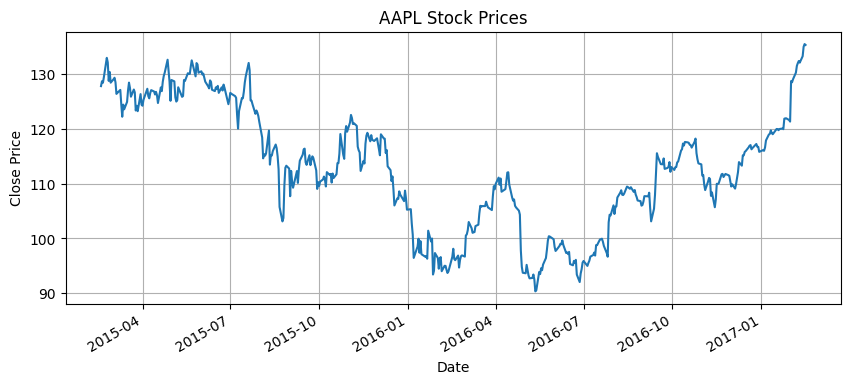

In [18]:
# Clean up
df.rename(columns={'AAPL.Close': 'Close'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot
df['Close'].plot(title='AAPL Stock Prices', figsize=(10, 4))
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid()
plt.show()

In [19]:
# See the summary of Dataset
df.describe()

,AAPL.Open,AAPL.High,AAPL.Low,Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up
count,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000,506.000000,506.000000
mean,112.935000,113.919447,111.942016,112.958340,4.317842e+07,110.459312,107.311385,112.739865,118.168345
std,11.287490,11.251892,11.263687,11.244744,1.985253e+07,10.537529,11.095804,10.595315,10.670752
min,90.000000,91.669998,89.470001,90.339996,1.147590e+07,89.008370,85.508858,94.047166,97.572721
25%,105.482500,106.349999,104.657501,105.672499,2.974240e+07,103.484803,97.011245,104.954875,111.052267
50%,112.889999,114.145001,111.800003,113.025002,3.747460e+07,110.821123,107.351628,112.799750,118.472542
75%,122.267498,123.497500,121.599998,122.179998,5.076395e+07,119.255457,114.812152,121.889416,128.515793
max,135.669998,136.270004,134.839996,135.509995,1.622063e+08,135.509995,127.289258,129.845000,138.805366


In [24]:
# Check for missing values
df.isna().sum()  # Check

,0
AAPL.Open,0
AAPL.High,0
AAPL.Low,0
Close,0
AAPL.Volume,0
AAPL.Adjusted,0
dn,0
mavg,0
up,0
direction,0


In [26]:
# Load Another Dataset
df_air=pd.read_csv('AAPL.csv')
df_air.head()

,Date,AAPL.Open,AAPL.High,AAPL.Low,Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,17-02-2015,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,18-02-2015,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,19-02-2015,128.479996,129.029999,128.330002,NaN,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,20-02-2015,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,23-02-2015,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing


In [28]:
# Check for missing values
df_air.isna().sum()  # Check

,0
Date,0
AAPL.Open,0
AAPL.High,0
AAPL.Low,0
Close,7
AAPL.Volume,0
AAPL.Adjusted,0
dn,0
mavg,0
up,0


In [32]:
#to check which records have null values
df_air[df_air.isna().any(axis=1)]


,Date,AAPL.Open,AAPL.High,AAPL.Low,Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
2,19-02-2015,128.479996,129.029999,128.330002,NaN,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
16,11-03-2015,124.750000,124.769997,122.110001,NaN,68939000,117.530609,123.592756,128.003334,132.413911,Decreasing
31,01-04-2015,124.820000,125.120003,123.099998,NaN,40621400,119.463174,122.376127,125.601000,128.825872,Decreasing
46,23-04-2015,128.300003,130.419998,128.139999,NaN,45770900,124.674363,123.371682,126.111666,128.851651,Increasing
102,14-07-2015,126.040001,126.370003,125.040001,NaN,31768100,121.275250,122.343664,125.998834,129.654003,Decreasing
286,06-04-2016,110.230003,110.980003,109.199997,NaN,26404100,108.662839,100.311852,106.249000,112.186147,Increasing
417,11-10-2016,117.699997,118.690002,116.199997,NaN,64041000,115.206456,111.129804,113.715333,116.300863,Decreasing


In [31]:
df_air[df_air['Close'].isna()]


,Date,AAPL.Open,AAPL.High,AAPL.Low,Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
2,19-02-2015,128.479996,129.029999,128.330002,NaN,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
16,11-03-2015,124.750000,124.769997,122.110001,NaN,68939000,117.530609,123.592756,128.003334,132.413911,Decreasing
31,01-04-2015,124.820000,125.120003,123.099998,NaN,40621400,119.463174,122.376127,125.601000,128.825872,Decreasing
46,23-04-2015,128.300003,130.419998,128.139999,NaN,45770900,124.674363,123.371682,126.111666,128.851651,Increasing
102,14-07-2015,126.040001,126.370003,125.040001,NaN,31768100,121.275250,122.343664,125.998834,129.654003,Decreasing
286,06-04-2016,110.230003,110.980003,109.199997,NaN,26404100,108.662839,100.311852,106.249000,112.186147,Increasing
417,11-10-2016,117.699997,118.690002,116.199997,NaN,64041000,115.206456,111.129804,113.715333,116.300863,Decreasing
